# Proyecto Final 
------

Por Ramón Escobar para Ciencia de Datos en Python I (Abril 2021)

## Carga de datos y Train-Test Split

In [83]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

In [2]:
data = np.load('proyecto_training_data.npy', allow_pickle = False)

In [3]:
data.shape

(1460, 6)

In [4]:
pct_test = int(data.shape[0]*0.8)
pct_train = int(data.shape[0]*0.2)
np.random.shuffle(data)

train, test = data[:pct_test], data[:pct_train]
train.shape, test.shape

((1168, 6), (292, 6))

## Descriptivos de datos

In [5]:
train = pd.DataFrame(train, 
             columns = ['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

test = pd.DataFrame(test, 
             columns = ['SalePrice','OverallQual', '1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [6]:
train.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,961.000000
mean,180724.297089,6.086473,1158.504281,6.501712,1970.941781,70.177940
std,79981.416740,1.367472,374.885214,1.592613,30.172086,23.523361
min,35311.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,130000.000000,5.000000,882.000000,5.000000,1953.000000,60.000000
50%,162000.000000,6.000000,1082.000000,6.000000,1972.000000,70.000000
75%,213062.500000,7.000000,1383.000000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,12.000000,2009.000000,313.000000


## Histogramas

In [80]:
def hist_dimensions(data, dimension):
    plot = sns.displot(data = data, x = dimension)
    plt.title(dimension)
    plt.xlabel(dimension, fontsize = 12)
    plt.ylabel('Conteo', fontsize = 12)
    plt.show()

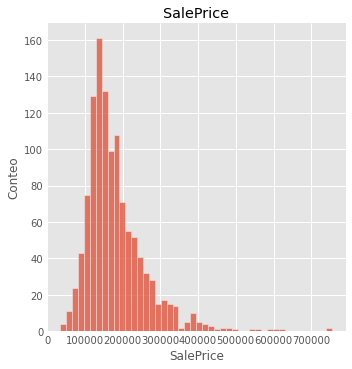

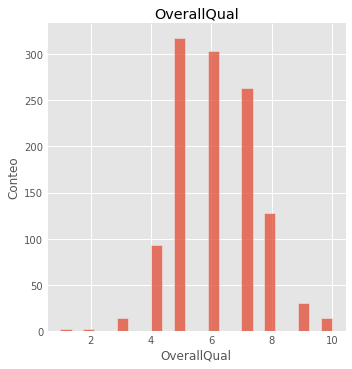

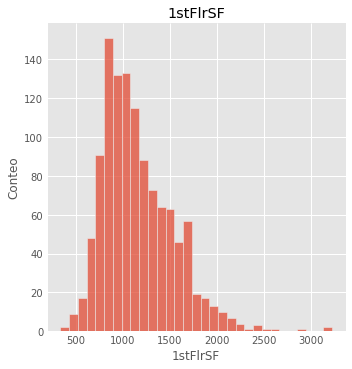

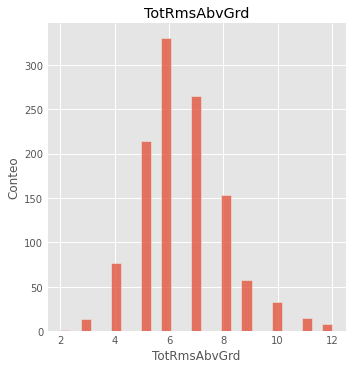

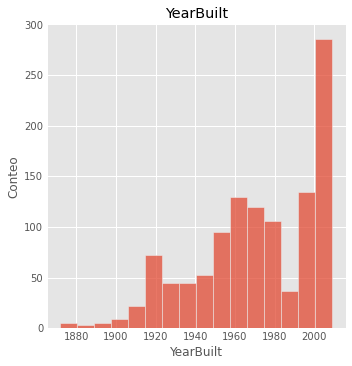

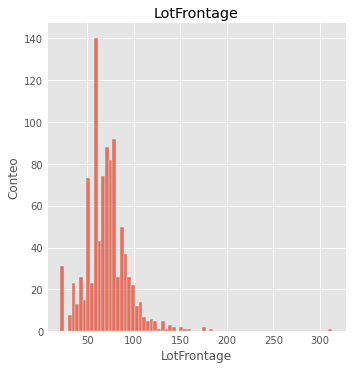

In [81]:
for i in train.columns.to_list():
    hist_dimensions(train, i)

## Correlaciones

In [16]:
def correlations_xy(data, x_dim, y_dim):
    corr = (pd.DataFrame(data[[x_dim, y_dim]]).corr().iloc[0,1])
    plt.figure(figsize = (7,3))
    plt.scatter(data = data, x = x_dim, y = y_dim)
    plt.title(str(x_dim)+' vs '+ str(y_dim) + ' | Corr:'+str((round(corr,4))), fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()

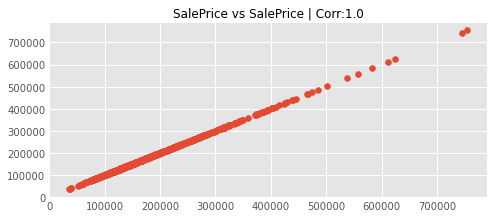

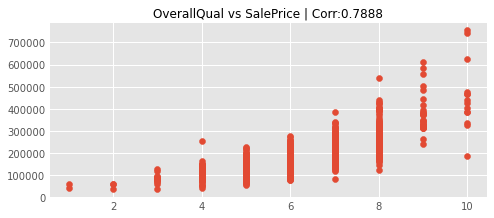

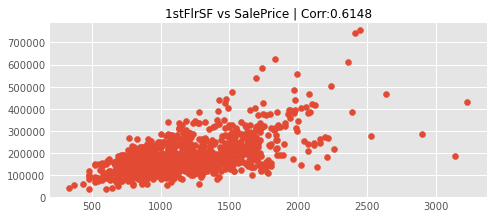

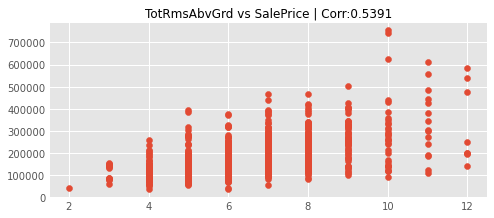

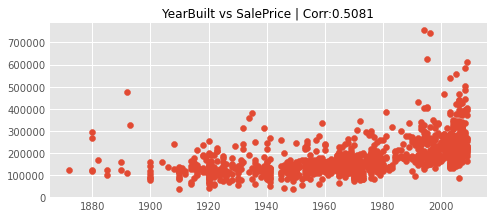

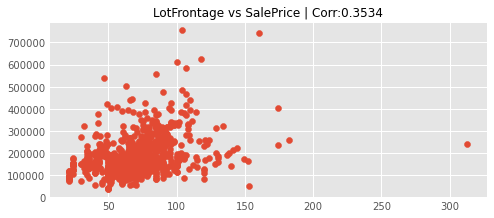

In [82]:
for i in train.columns.to_list():
    correlations_xy(train, i, 'SalePrice')

Basado en esta información, OverallQual 1stFlrFS son las candidatas a ser las variables con mayor poder predictivo

## Regresión

### Vectorización

In [18]:
#x_train, y_train
#x_test, y_test

In [77]:
def univ_linear_reg(x, y=0, epochs=100, imprimir_error_cada=10, learning_rate = 0.001):
    #vectorizando x
    vect_ones = np.ones_like(x).reshape(-1,1)
    x = np.reshape(x,(-1,1))
    x = np.hstack([x,vect_ones])
    
    y = np.reshape(y, (-1,1))
    #inicializando betas
    
    
    b0 = np.random.rand()
    b1 = np.random.rand()
    
    #b0 = 0
    #b1 = np.mean(x)
    
    betas = np.array([[b1],[b0]])
    
    errors = []
    models = {}
    
    results ={}
    for i in range(0,epochs):
        #Predicciones
        y_pred = np.dot(x, betas)
        
        #Calculo del error
        e = 1/(2*y.shape[0]) * sum((y - y_pred)**2)
        errors.append(e[0])
        
        #calculando gradientes

        gradient = 1/y.shape[0]*sum((y_pred - y)*x)
        
        mult_gradient = (learning_rate*gradient)
        mult_gradient = mult_gradient.reshape((-1,1))
        betas = betas - mult_gradient
        
        models[i] = [betas]
        
        if i%imprimir_error_cada==0:
            print('Iteración: ', i)
            print('Error: ',e[0])
            print("")
            
    return models , np.array(errors)

In [78]:
x = np.arange(10)
y = x*10

In [79]:
models, errors = univ_linear_reg(x, y, 1000000,100000,0.000001)

Iteración:  0
Error:  1180.0553917439172

Iteración:  100000
Error:  3.7090808827202326

Iteración:  200000
Error:  0.28375313856307166

Iteración:  300000
Error:  0.258835350898517

Iteración:  400000
Error:  0.24459621785978444

Iteración:  500000
Error:  0.23116590877565324

Iteración:  600000
Error:  0.21847310610357662

Iteración:  700000
Error:  0.2064772370322948

Iteración:  800000
Error:  0.1951400342722913

Iteración:  900000
Error:  0.18442533193058394



In [72]:
def error_plot(errors):
    plt.plot(errors)
    plt.show()

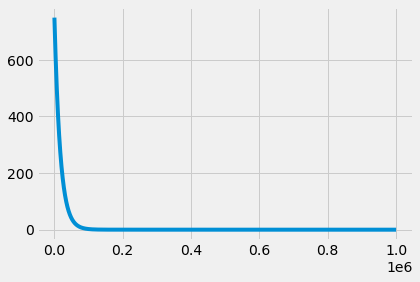

In [73]:
error_plot(errors)